In [81]:
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer, BasicAer
from qiskit.tools.monitor import job_monitor
import numpy as np
from scipy.optimize import minimize
from pylab import *
from Ising_n_exact import *
from math import *
from qiskit.visualization import plot_histogram
from qiskit.circuit.quantumregister import AncillaQubit, AncillaRegister

In [82]:
bit = ['0','1']
dic = []
n = 4
def decToBin(k, n): 
    q1 = bin(k).replace("0b", "")
    q2 = '0'*(n-len(q1)) + q1
    q2 =q2[::-1]
    return q2
for k in range(0,2**n):
    dic.append(decToBin(k, n)[::-1])
#dic

In [83]:
h = float(input())
g = float(input())

5
3


In [84]:
ha = np.array([g*h, g*h, 2*g, 1])
nor = np.sqrt(sum(ha[:]**2))
psiS = ha/nor
psiS

array([0.67971488, 0.67971488, 0.27188595, 0.04531433])

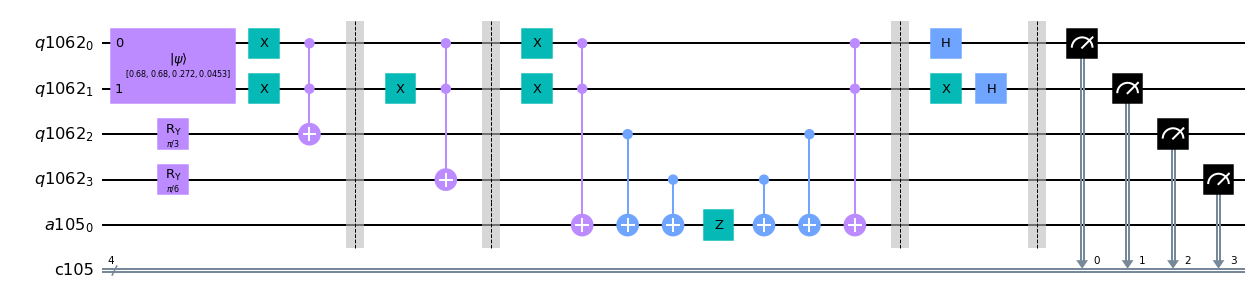

In [85]:
num_shot = 100000
q = QuantumRegister(4)
c = ClassicalRegister(4)
ancreg = AncillaRegister(1)

anc = AncillaQubit(ancreg, 0)
qc = QuantumCircuit(q, c, ancreg)

qc.initialize(psiS, [q[0],q[1]])
qc.ry(np.pi/3, q[2])
qc.ry(np.pi/6, q[3])
# qc.h([2, 3])
# qc.initialize(vec, [q[2], q[3]])
qc.x([0, 1])
qc.mct([0, 1], 2)

qc.barrier()
qc.x(1)
qc.mct([0, 1], 3)

qc.barrier()
qc.x([0, 1])
qc.mct([0, 1], anc)
# qc.cz(anc, [2, 3])
qc.cx(q[2], anc)
qc.cx(q[3], anc)
qc.z(anc)
qc.cx(q[3], anc)
qc.cx(q[2], anc)

qc.mct([0, 1], anc)
qc.barrier()
#
qc.x(1)

qc.h([0, 1])
#     qc.initialize([1,0,0,0], [q[0],q[1]])
qc.barrier()
#     if i == k-1:
#         break
#     else:
#         qc.initialize(psiS, [q[0],q[1]])

#qc.measure([2, 3], [2, 3])
qc.measure(range(4), range(4))
qc.draw('mpl')

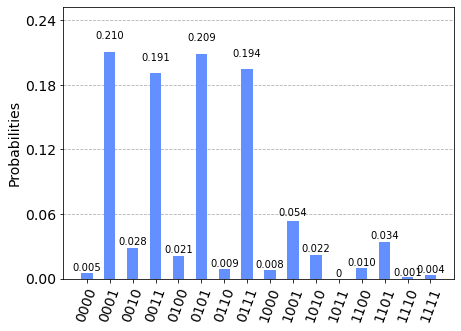

In [86]:
shots = num_shot
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=shots).result()
counts = result.get_counts()
for i in dic:
        if i not in counts:
            counts[i] = 0
plot_histogram(counts)

In [87]:
arr = np.array([(counts['0000']), (counts['0100']), (counts['1000']),(counts['1100'])])
# norm = np.linalg.norm(arr)
normal = sum(arr[:])
array = arr/normal
new = np.array(list(np.sqrt(array[:])))
new

array([0.33914872, 0.69703107, 0.42141873, 0.47067196])

In [88]:
k = 10
for j in range(1, k):
    q = QuantumRegister(4)
    c = ClassicalRegister(4)
    ancreg = AncillaRegister(1)

    anc = AncillaQubit(ancreg, 0)
    qc = QuantumCircuit(q, c, ancreg)
    qc.initialize(psiS, [q[0],q[1]])


    qc.initialize(new, [q[2],q[3]])
    
    qc.x([0, 1])
    qc.mct([0, 1], 2)

    qc.barrier()
    qc.x(1)
    qc.mct([0, 1], 3)

    qc.barrier()
    qc.x([0, 1])
    qc.mct([0, 1], anc)
    qc.cz(anc, [2, 3])
    qc.mct([0, 1], anc)
    qc.barrier()
    #
    qc.x(1)


    qc.h([0, 1])
    qc.barrier()

    qc.measure(range(4), range(4))
    # shot
    shots = num_shot
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=shots).result()
    count = result.get_counts()
    for i in dic:
            if i not in count:
                count[i] = 0
    
    # update x(t+1)
    arr = np.array([(count['0000']), (count['0100']), (count['1000']),(count['1100'])])
    normal = sum(arr[:])
    array = arr/normal
    new = np.array(list(np.sqrt(array[:])))
    print('epoch ', j, ':', new)

epoch  1 : [0.70819411 0.06910078 0.12635004 0.69117425]
epoch  2 : [0.49471826 0.51907535 0.48372472 0.5018217 ]
epoch  3 : [0.69730842 0.12166607 0.13990128 0.69237704]
epoch  4 : [0.51757385 0.48409273 0.47180316 0.52456966]
epoch  5 : [0.68609427 0.15710252 0.16634413 0.69059617]
epoch  6 : [0.53551576 0.46046038 0.45387331 0.54332138]
epoch  7 : [0.68280773 0.18095858 0.18706419 0.68266726]
epoch  8 : [0.54921515 0.44571728 0.43940701 0.55373306]
epoch  9 : [0.67742089 0.1968194  0.20155115 0.67951468]


In [89]:
Emin_exact,vec_Emin_exact=groundsate(n=2, h=h)
Psi=vec_Emin_exact
theta = Theta(Psi)
theta.append(0)
theta

[1.5707963267948963, 1.373400766945016, 1.768191886644777, 0]

In [90]:
vec = list(vec_Emin_exact)
vec

[0.5468354723173562, 0.448297854350714, 0.448297854350714, 0.546835472317356]